In [1]:
import pandas as pd  # Importing the Pandas library for data manipulation and analysis.
import numpy as np  # Importing the NumPy library for numerical computations and array operations.
import matplotlib.pyplot as plt  # Importing the Matplotlib library for data visualization.
import seaborn as sns  # Importing the Seaborn library for creating statistical graphics.
from sklearn.model_selection import train_test_split  # Importing the train_test_split function for splitting data into training and testing subsets.
from sklearn.ensemble import RandomForestClassifier  # Importing the RandomForestClassifier class for building a random forest classifier model.
from sklearn.metrics import accuracy_score  # Importing the accuracy_score function for evaluating classification accuracy.
from sklearn.model_selection import cross_val_score  # Importing the cross_val_score function for performing cross-validation.
from sklearn.model_selection import GridSearchCV  # Importing the GridSearchCV class for hyperparameter tuning using grid search.
from sklearn.metrics import confusion_matrix  # Importing the confusion_matrix function for computing the confusion matrix.
from sklearn.metrics import classification_report  # Importing the classification_report function for generating a classification report.
from sklearn.preprocessing import StandardScaler  # Importing the StandardScaler class for feature scaling.

In [2]:
# Loading data with infertility into the kernel
file_path_with_infertility = "PCOS_infertility.csv"#csv file
PCOS_inf = pd.read_csv(file_path_with_infertility)#The resulting DataFrame is stored in the variable PCOS_inf variable

# Loading data without infertility into the kernel
file_path_without_infertility = "PCOS_data_without_infertility.xlsx"#csv file
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")#The resulting DataFrame is stored in the variable PCOS_woinf


In [3]:
PCOS_inf.head()#is used to display the first few rows of the DataFrame(by default the frst fivve rows)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [4]:
PCOS_woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [5]:
print("PCOS inf", PCOS_inf.shape)#Printing the shape of the PCOS_inf DataFrame()
print("PCOS woinf", PCOS_woinf.shape)
"""AKA DataFrame.shape to determine the dimensions of the dataset. 
It prints the string "PCOS inf" and "PCOS woinf" along with the shape (number of rows, number of columns)
of the PCOS_inf DataFrame."""

PCOS inf (541, 6)
PCOS woinf (541, 45)


'AKA DataFrame.shape to determine the dimensions of the dataset. \nIt prints the string "PCOS inf" and "PCOS woinf" along with the shape (number of rows, number of columns)\nof the PCOS_inf DataFrame.'

# Merging the two files as per patient file no. and dropping the repeated features

In [6]:
# Merging the datasets based on the 'Patient File No.' column
data = pd.merge(PCOS_woinf, PCOS_inf, on='Patient File No.', suffixes=('', '_y'), how='left')#The 'left' join type is used to retain 
#all the rows from PCOS_woinf and add matching rows from PCOS_inf

# Dropping the repeated features after merging the two csv files
data = data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
                  'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

# Displaying the first few rows of the merged dataset
data.head()


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [7]:
data.info()#The data.info() command provides information about the structure and summary of the data DataFrame.
#It displays the column names, data types, and non-null counts for each column, as well as the total number of rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

# Encoding categorical variables (dtype objects)

In [8]:
data["AMH(ng/mL)"].head()#The code data["AMH(ng/mL)"].head() 
#retrieves the first few rows of the "AMH(ng/mL)" column from the data DataFrame.

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [9]:
#Similarly
data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [10]:
# Converting "AMH(ng/mL)" column to numeric
#The columns "AMH(ng/mL)" and "II beta-HCG(mIU/mL)" are converted to numeric values
#using the pd.to_numeric() function.
#The errors='coerce' argument is used to handle any non-numeric values and convert them to NaN (Not a Number).
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')

# Converting "II    beta-HCG(mIU/mL)" column to numeric
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

# Dealing with missing values by filling them with the median of the respective feature

# Filling missing values in "Marraige Status (Yrs)" column with the median
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(), inplace=True)

# Filling missing values in "II    beta-HCG(mIU/mL)" column with the median
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(), inplace=True)

# Filling missing values in "AMH(ng/mL)" column with the median
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(), inplace=True)

# Filling missing values in "Fast food (Y/N)" column with the median
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(), inplace=True)

# Clearing up the extra space in the column names (optional)
data.columns = [col.strip() for col in data.columns]

In [11]:
data.info()
"""The data.info() command provides information about the structure and summary of the data DataFrame.
It displays the column names, data types, and non-null counts for each column, as well as the total number of rows"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3   Age (yrs)               541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

'The data.info() command provides information about the structure and summary of the data DataFrame.\nIt displays the column names, data types, and non-null counts for each column, as well as the total number of rows'

In [12]:
# Having a look at some basic statistical details.
data.describe()#you will obtain a summary of descriptive statistics for each numerical column
"""in the DataFrame. This includes count (number of non-null values),
mean, standard deviation, minimum value, 25th percentile (Q1), 
median (50th percentile or Q2), 75th percentile (Q3), and maximum value."""

'in the DataFrame. This includes count (number of non-null values),\nmean, standard deviation, minimum value, 25th percentile (Q1), \nmedian (50th percentile or Q2), 75th percentile (Q3), and maximum value.'

'The cmap="Pastel1" argument sets the color map to "Pastel1" for a visually appealing color scheme.\nThe square=True argument ensures that each cell in the heatmap is square-shaped.'

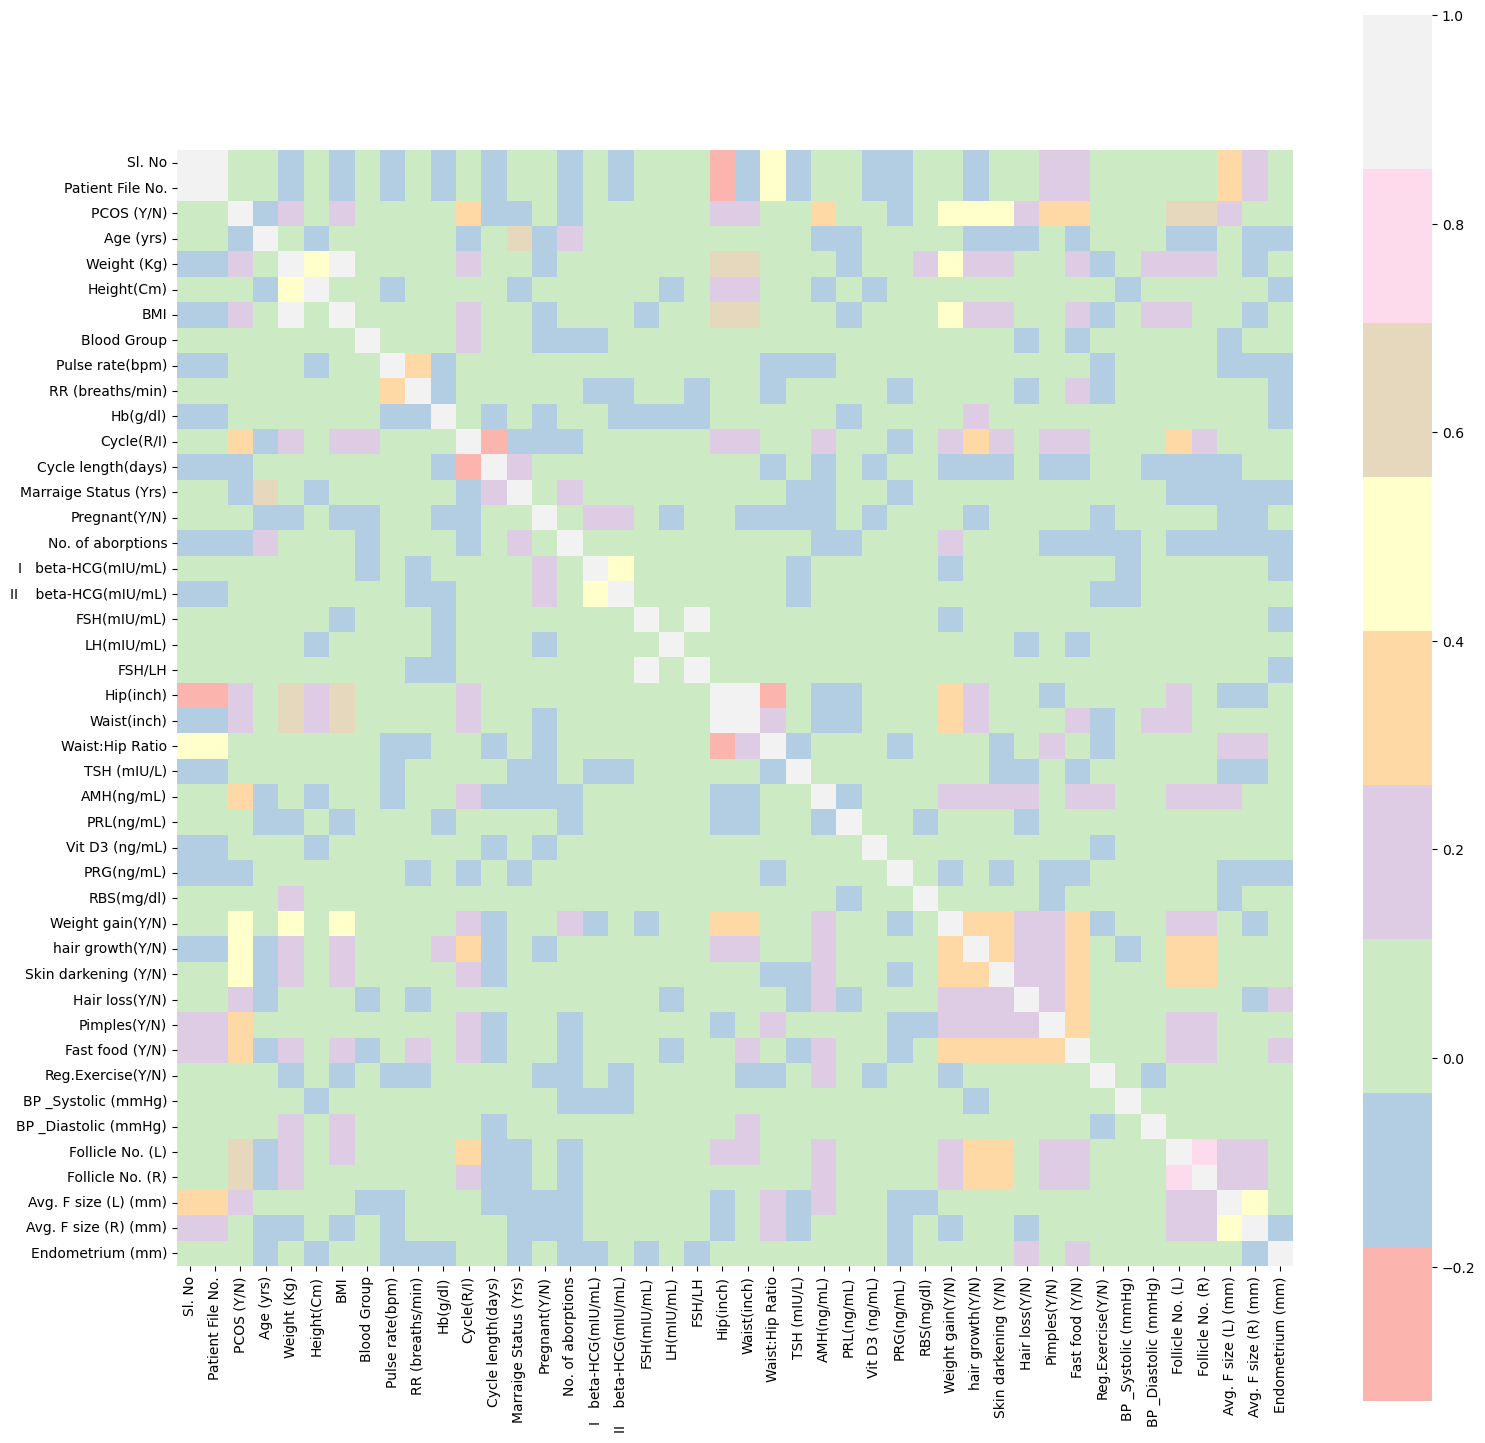

In [13]:
#Examining a correlation matrix of all the features 
corrmat = data.corr()  # Calculating the correlation matrix of the DataFrame and saving the result in corrmat variable

plt.subplots(figsize=(18, 18))  # Creating a larger figure for better visibility of the heatmap

# Creating a heatmap using Seaborn's heatmap function
sns.heatmap(corrmat, cmap="Pastel1", square=True)
"""The cmap="Pastel1" argument sets the color map to "Pastel1" for a visually appealing color scheme.
The square=True argument ensures that each cell in the heatmap is square-shaped."""

In [14]:
#How all the features correlate with the PCOS 

corrmat["PCOS (Y/N)"].sort_values(ascending=False) # Sorting the correlation values in descending order
"""The sort_values(ascending=False) method is used to sort the correlation values in descending order.
This will arrange the features 
in the data DataFrame based on their correlation with the "PCOS (Y/N)" column, from highest to lowest."""

'The sort_values(ascending=False) method is used to sort the correlation values in descending order.\nThis will arrange the features \nin the data DataFrame based on their correlation with the "PCOS (Y/N)" column, from highest to lowest.'

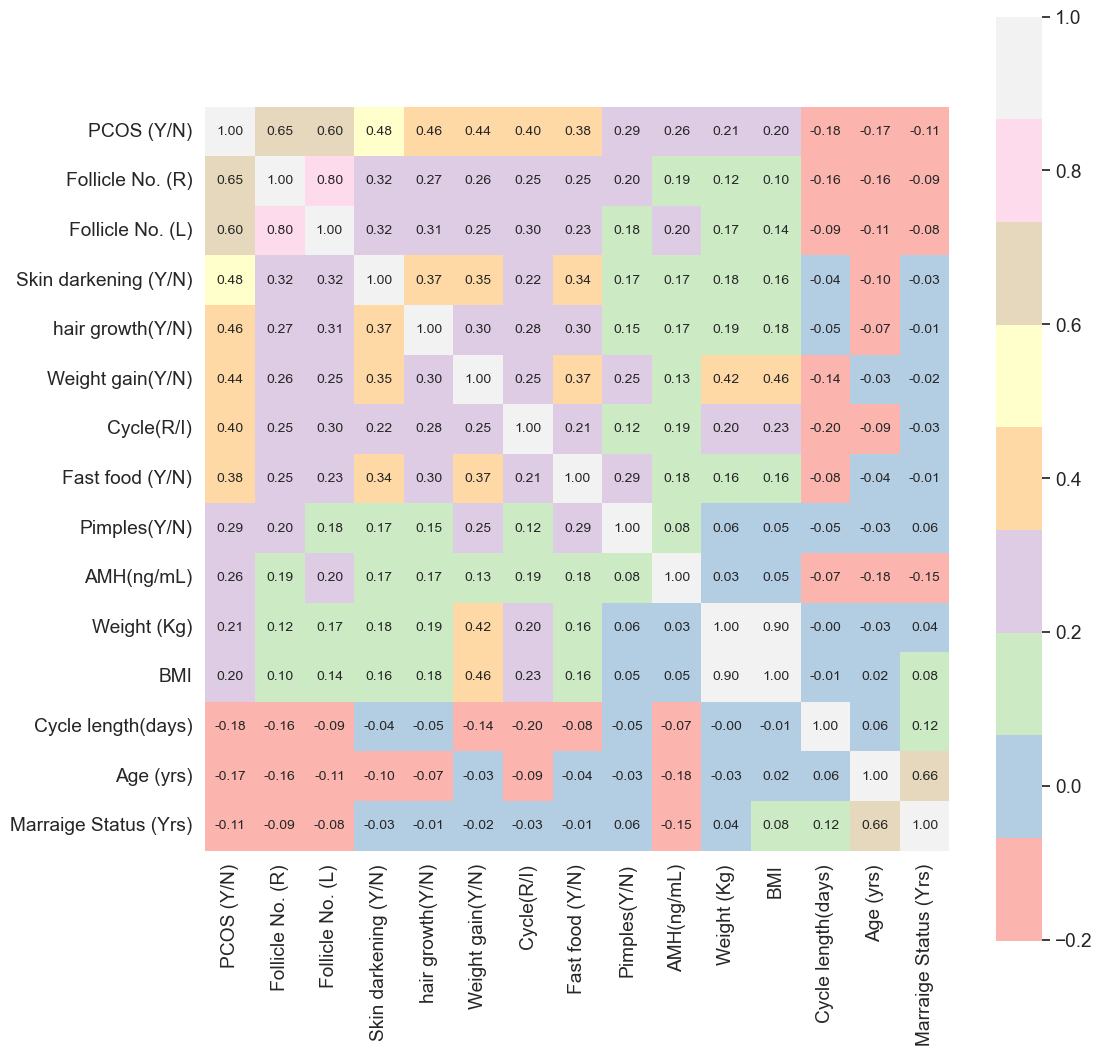

In [15]:
plt.figure(figsize=(12, 12))  # Creating a larger figure for better visibility of the heatmap

k = 12  # Number of variables with positive correlation to include in the heatmap(manually selected by analysing the previous corr data)
l = 3  # Number of variables with negative correlation to include in the heatmap(manually selected by analysing the previous corr data)

# Selecting the top k variables with positive correlation with "PCOS (Y/N)"
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index

# Selecting the top l variables with negative correlation with "PCOS (Y/N)"
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index

# Combining the selected variables into a single list
cols = cols_p.append(cols_n)

# Calculating the correlation matrix for the selected variables
cm = np.corrcoef(data[cols].values.T)

sns.set(font_scale=1.25)  # Setting the font scale for better readability

# Creating the heatmap using Seaborn's heatmap function
hm = sns.heatmap(cm, cbar=True, cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
"""The yticklabels and xticklabels arguments
                 ensure that the feature names are displayed on the y-axis and x-axis, respectively."""

plt.show()  # Displaying the heatmap

# Patterns Of Length Of The Menstrual Cycle

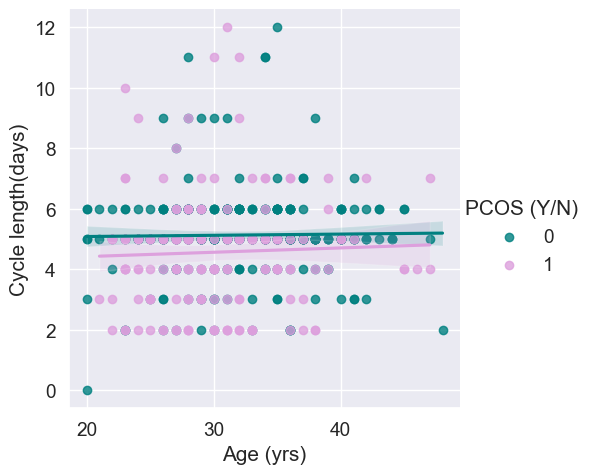

'By executing this code, you will generate a scatter plot that compares the length\nof the menstrual phase (cycle length in days) between individuals with PCOS and those without PCOS'

In [16]:
color = ["teal", "plum"]  # Colors for differentiating PCOS and non-PCOS groups

# Creating a scatter plot with a linear regression line
fig = sns.lmplot(data=data, x="Age (yrs)", y="Cycle length(days)", hue="PCOS (Y/N)", palette=color)#hue parameter is set to "PCOS (Y/N)", 
#which differentiates the data points based on the PCOS status.

plt.show(fig)  # Displaying the plot
"""By executing this code, you will generate a scatter plot that compares the length
of the menstrual phase (cycle length in days) between individuals with PCOS and those without PCOS"""

### Patterns Of BMI

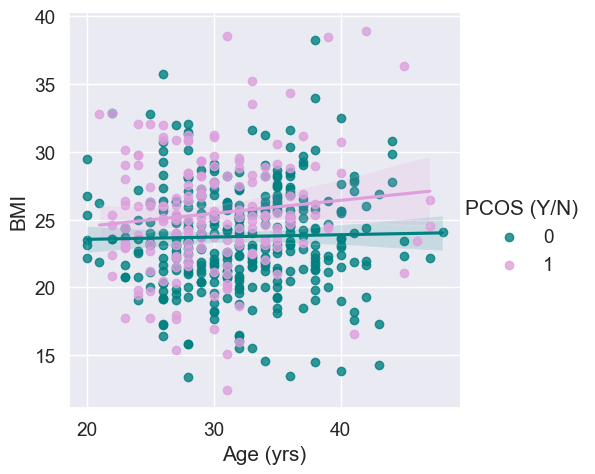

In [17]:
# Creating a scatter plot with a linear regression line to analyze the pattern of weight gain (BMI) over the years in individuals with PCOS and those without PCOS
fig = sns.lmplot(data=data, x="Age (yrs)", y="BMI", hue="PCOS (Y/N)", palette=color)

# Displaying the plot
plt.show(fig)

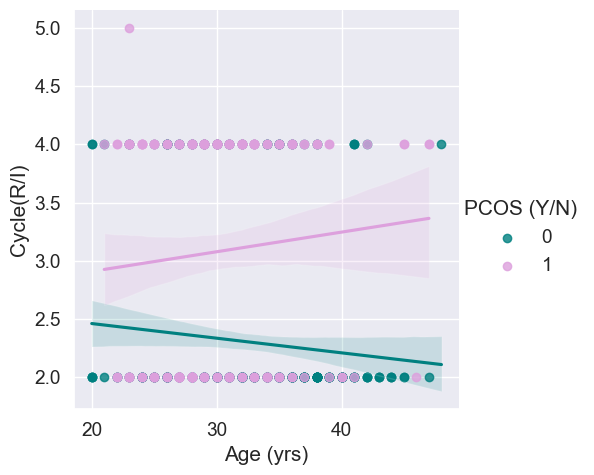

In [18]:
# Creating a scatter plot with a linear regression line to analyze the relationship between cycle RI and age, differentiated by PCOS status
sns.lmplot(data=data, x="Age (yrs)", y="Cycle(R/I)", hue="PCOS (Y/N)", palette=color)

# Displaying the plot
plt.show()

# Number Of Follicles 

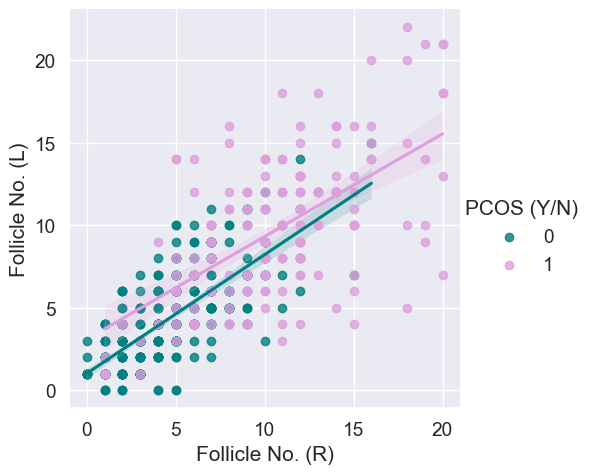

In [19]:
# Creating a scatter plot to visualize the distribution of follicles in both ovaries, differentiated by PCOS status
sns.lmplot(data=data, x='Follicle No. (R)', y='Follicle No. (L)', hue="PCOS (Y/N)", palette=color)

# Displaying the plot
plt.show()

# Model Building

In [20]:
# Assigning the features (X) and target (y)

# Removing the target variable "PCOS (Y/N)" and unnecessary columns from the features (X)
X = data.drop(["PCOS (Y/N)", "Sl. No", "Patient File No.","Pulse rate(bpm)","RR (breaths/min)","Hb(g/dl)","I   beta-HCG(mIU/mL)","II    beta-HCG(mIU/mL)","FSH(mIU/mL)","LH(mIU/mL)","FSH/LH", "TSH (mIU/L)","AMH(ng/mL)","PRL(ng/mL)","Vit D3 (ng/mL)","PRG(ng/mL)","RBS(mg/dl)",
    "BP _Systolic (mmHg)","BP _Diastolic (mmHg)","Follicle No. (L)","Follicle No. (R)","Avg. F size (L) (mm)","Avg. F size (R) (mm)",
     "Endometrium (mm)"], axis=1)

# Assigning the target variable "PCOS (Y/N)" to y
y = data["PCOS (Y/N)"]

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age (yrs)              541 non-null    int64  
 1   Weight (Kg)            541 non-null    float64
 2   Height(Cm)             541 non-null    float64
 3   BMI                    541 non-null    float64
 4   Blood Group            541 non-null    int64  
 5   Cycle(R/I)             541 non-null    int64  
 6   Cycle length(days)     541 non-null    int64  
 7   Marraige Status (Yrs)  541 non-null    float64
 8   Pregnant(Y/N)          541 non-null    int64  
 9   No. of aborptions      541 non-null    int64  
 10  Hip(inch)              541 non-null    int64  
 11  Waist(inch)            541 non-null    int64  
 12  Waist:Hip Ratio        541 non-null    float64
 13  Weight gain(Y/N)       541 non-null    int64  
 14  hair growth(Y/N)       541 non-null    int64  
 15  Skin d

# Normalizing the Training Data

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
#By applying the scaling to X before the split, you ensure that the scaling is based on the distribution of the entire dataset
# performing the scaling before the split, you avoid potential information leakage from the test set into the training process.
#This helps to maintain the independence of the test set and ensures that the model's evaluation is based on unseen data.

# Save the MinMaxScaler Values To Help in normalizayion during deployed tflite model

In [23]:
import json

scaler_data = {
    'scale_': sc.scale_.tolist(),
    'min_': sc.min_.tolist(),
    'data_min_': sc.data_min_.tolist(),
    'data_max_': sc.data_max_.tolist(),
    'data_range_': sc.data_range_.tolist(),
}

with open('E:\min_max_scaler.json', 'w') as f:
    json.dump(scaler_data, f)

# Splitting The Data Into Training and Testing Set

In [24]:

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
from sklearn.preprocessing import MinMaxScaler
"""The train_test_split() function is used to split the data into training and test sets.
The features (X) and target (y) are passed as arguments, and the test_size parameter is set
to 0.3, indicating that 30% of the data will be used for testing, while 70% will be used for 
training. The function returns four sets of data: X_train (training features), X_test (test features), 
y_train (training target), and y_test (test target)."""

'The train_test_split() function is used to split the data into training and test sets.\nThe features (X) and target (y) are passed as arguments, and the test_size parameter is set\nto 0.3, indicating that 30% of the data will be used for testing, while 70% will be used for \ntraining. The function returns four sets of data: X_train (training features), X_test (test features), \ny_train (training target), and y_test (test target).'

# Building And Fitting(Training) The Model

In [26]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(20,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['acc'])


model.fit(X, y, epochs=500,batch_size=32)

Epoch 1/500
17/17 [==============================] - 3s 4ms/step - loss: 0.6612 - acc: 0.6654
Epoch 2/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5936 - acc: 0.7116
Epoch 3/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5127 - acc: 0.7837
Epoch 4/500
17/17 [==============================] - 0s 3ms/step - loss: 0.4342 - acc: 0.8466
Epoch 5/500
17/17 [==============================] - 0s 4ms/step - loss: 0.3930 - acc: 0.8651
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 0.3781 - acc: 0.8614
Epoch 7/500
17/17 [==============================] - 0s 4ms/step - loss: 0.3724 - acc: 0.8577
Epoch 8/500
17/17 [==============================] - 0s 4ms/step - loss: 0.3689 - acc: 0.8614
Epoch 9/500
17/17 [==============================] - 0s 4ms/step - loss: 0.3624 - acc: 0.8651
Epoch 10/500
17/17 [==============================] - 0s 4ms/step - loss: 0.3611 - acc: 0.8725
Epoch 11/500
17/17 [==============================] - 0s 4m

# Evaluating The Model Performance

In [27]:
# Evaluate the model on the test set

loss, accuracy = model.evaluate(X_test, y_test)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy*100)

4/4 [==============================] - 0s 5ms/step - loss: 1.7931e-05 - acc: 1.0000
Test Loss: 1.79314156412147e-05
Test Accuracy: 100.0


# Save The Model And The MinMaxScaler Weights

In [28]:
import joblib

model.save('E:/pcos_model.h5')

joblib.dump(sc,'E:/min_max_scaler.pkl')

['E:/min_max_scaler.pkl']

# Testing the Model On Some Samples

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

new_data = pd.DataFrame({
    'Age (yrs)': [28, 36, 33, 37],#keep 1
    'Weight (Kg)': [44.6, 65.0, 68.8, 65.0],#keep 2
    'Height(Cm)': [152.0, 161.5, 165.0, 148.0],#keep 3
    'BMI': [19.3, 24.92116286, 25.27089073, 29.67494522],#keep 4
    'Blood Group': [15, 15, 11, 13],#keep 5
    'Cycle(R/I)': [2, 2, 2, 2],#keep 6
    'Cycle length(days)': [5, 5, 5, 5],#keep 7
    'Marraige Status (Yrs)': [7.0, 11.0, 10.0, 4.0],#keep 8
    'Pregnant(Y/N)': [0, 1, 1, 0],#keep 9
    'No. of aborptions': [0, 0, 0, 0],#keep 10
    'Hip(inch)': [36, 38, 40, 42],#keep 11
    'Waist(inch)': [30, 32, 36, 36],#keep 12
    'Waist:Hip Ratio': [0.833333333, 0.842105263, 0.9, 0.857142857],#keep 13
    'Weight gain(Y/N)': [0, 0, 0, 0],#keep 14
    'hair growth(Y/N)': [0, 0, 0, 0],#keep 15
    'Skin darkening (Y/N)': [0, 0, 1, 0],#keep 16
    'Hair loss(Y/N)': [0, 0, 1, 0],#keep 17
    'Pimples(Y/N)': [0, 0, 1, 0],#keep 18
    'Fast food (Y/N)': [1, 0, 1, 0],#keep 19
    'Reg.Exercise(Y/N)': [0, 0, 1, 0],#keep 20
})
# Preprocess the new data (perform the same preprocessing as done on the training data)
new_data_scaled = sc.fit_transform(new_data)

# Make predictions using the loaded model
new_data_predictions = model.predict(new_data_scaled)
# Loop through the new_data_predictions
for prediction in new_data_predictions:
    if prediction == 1:
        print("PCOS detected")
    else:
        print("PCOS not detected")

1/1 [==============================] - 0s 284ms/step
PCOS not detected
PCOS not detected
PCOS not detected
PCOS not detected


# Testing The .h5 Model

In [32]:
import joblib
from tensorflow.keras.models import load_model

#Load The Trained Model
model = load_model('E:\pcos_model.h5')

#Load the MinMaxScaler
scaler = joblib.load('E:/min_max_scaler.pkl')

# Load the new dataframe
# Define the new data(Having Four Samples Per Feature)
new_data = pd.DataFrame({
    'Age (yrs)': [28, 36, 33, 37],#keep 1
    'Weight (Kg)': [44.6, 65.0, 68.8, 65.0],#keep 2
    'Height(Cm)': [152.0, 161.5, 165.0, 148.0],#keep 3
    'BMI': [19.3, 24.92116286, 25.27089073, 29.67494522],#keep 4
    'Blood Group': [15, 15, 11, 13],#keep 5
    'Cycle(R/I)': [2, 2, 2, 2],#keep 6
    'Cycle length(days)': [5, 5, 5, 5],#keep 7
    'Marraige Status (Yrs)': [7.0, 11.0, 10.0, 4.0],#keep 8
    'Pregnant(Y/N)': [0, 1, 1, 0],#keep 9
    'No. of aborptions': [0, 0, 0, 0],#keep 10
    'Hip(inch)': [36, 38, 40, 42],#keep 11
    'Waist(inch)': [30, 32, 36, 36],#keep 12
    'Waist:Hip Ratio': [0.833333333, 0.842105263, 0.9, 0.857142857],#keep 13
    'Weight gain(Y/N)': [0, 0, 0, 0],#keep 14
    'hair growth(Y/N)': [0, 0, 0, 0],#keep 15
    'Skin darkening (Y/N)': [0, 0, 1, 0],#keep 16
    'Hair loss(Y/N)': [0, 0, 1, 0],#keep 17
    'Pimples(Y/N)': [0, 0, 1, 0],#keep 18
    'Fast food (Y/N)': [1, 0, 1, 0],#keep 19
    'Reg.Exercise(Y/N)': [0, 0, 1, 0],#keep 20
})
# Preprocess the new data (perform the same preprocessing as done on the training data)
new_data_scaled = scaler.transform(new_data)

# Make predictions using the loaded model
new_data_predictions = model.predict(new_data_scaled)
# Loop through the new_data_predictions
for prediction in new_data_predictions:
    if prediction == 1:
        print("PCOS detected")
    else:
        print("PCOS not detected")

1/1 [==============================] - 0s 168ms/step
PCOS not detected
PCOS not detected
PCOS not detected
PCOS not detected


# Converting The Model To TFLite

In [33]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

tfmodel = converter.convert()

open('E:/model.tflite', 'wb').write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpgm807360\assets


INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpgm807360\assets


20552

# Creating Testing DataFrame For TFLite model

In [34]:
new_data = pd.DataFrame({
    'Age (yrs)': [28, 36, 33, 37],#keep 1
    'Weight (Kg)': [44.6, 65.0, 68.8, 65.0],#keep 2
    'Height(Cm)': [152.0, 161.5, 165.0, 148.0],#keep 3
    'BMI': [19.3, 24.92116286, 25.27089073, 29.67494522],#keep 4
    'Blood Group': [15, 15, 11, 13],#keep 5
    'Cycle(R/I)': [2, 2, 2, 2],#keep 6
    'Cycle length(days)': [5, 5, 5, 5],#keep 7
    'Marraige Status (Yrs)': [7.0, 11.0, 10.0, 4.0],#keep 8
    'Pregnant(Y/N)': [0, 1, 1, 0],#keep 9
    'No. of aborptions': [0, 0, 0, 0],#keep 10
    'Hip(inch)': [36, 38, 40, 42],#keep 11
    'Waist(inch)': [30, 32, 36, 36],#keep 12
    'Waist:Hip Ratio': [0.833333333, 0.842105263, 0.9, 0.857142857],#keep 13
    'Weight gain(Y/N)': [0, 0, 0, 0],#keep 14
    'hair growth(Y/N)': [0, 0, 0, 0],#keep 15
    'Skin darkening (Y/N)': [0, 0, 1, 0],#keep 16
    'Hair loss(Y/N)': [0, 0, 1, 0],#keep 17
    'Pimples(Y/N)': [0, 0, 1, 0],#keep 18
    'Fast food (Y/N)': [1, 0, 1, 0],#keep 19
    'Reg.Exercise(Y/N)': [0, 0, 1, 0],#keep 20
})

# Testing TFLite Model

In [37]:
import numpy as np
import tensorflow as tf
import joblib
from sklearn.preprocessing import MinMaxScaler

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='E:/model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

#Load the MinMaxScaler
scaler = joblib.load('E:/min_max_scaler.pkl')
# Normalize the new input data
X_new_scaled = scaler.transform(new_data)



# Loop through the dataframe and test one sample at a time
predictions = []
for i in range(len(new_data)):
    # Get the current sample
    X_new = X_new_scaled[i]

    # Reshape the input data to match the expected shape
    X_new_reshaped = np.reshape(X_new, (1, -1))

    # Convert the input data type to float32
    X_new_float32 = X_new_reshaped.astype(np.float32)

    # Set the input tensor data
    interpreter.set_tensor(input_details[0]['index'], X_new_float32)

    # Run the inference
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Perform post-processing (Example: Convert probabilities to binary predictions)
    prediction = 1 if output_data > 0.5 else 0

    # Add the prediction to the list
    predictions.append(prediction)

print(predictions)

[0, 0, 1, 0]
